In [6]:
import pandas as pd

# Load datasets
fake_df = pd.read_csv("Fake.csv")
real_df = pd.read_csv("True.csv")

# Add labels
fake_df['label'] = 0  # Fake
real_df['label'] = 1  # Real

# Combining both datasets
df = pd.concat([fake_df, real_df], ignore_index=True)

# Shuffling the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print(df.info())
print(df[['title', 'text', 'label']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text  label  
0  21st Century Wire says Ben Stein, reputable pr...      0  
1  WASHINGTON (Reuters) - U.S. President Donald T...      1  
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...   

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8196\3406772962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df, palette='Set2')


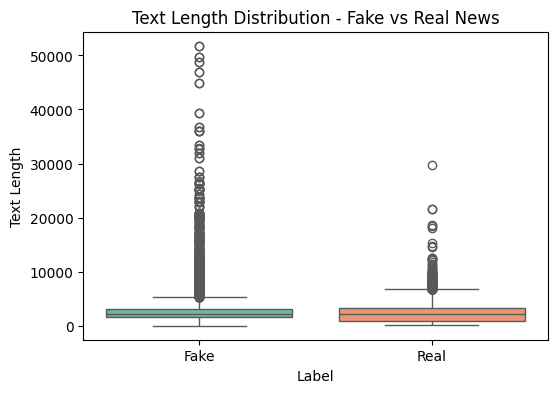

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(6, 4))
sns.boxplot(x='label', y='text_length', data=df, palette='Set2')
plt.title('Text Length Distribution - Fake vs Real News')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()


In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
print(df['text'].head(10))


0    21st Century Wire says Ben Stein, reputable pr...
1    WASHINGTON (Reuters) - U.S. President Donald T...
2    (Reuters) - Puerto Rico Governor Ricardo Rosse...
3    On Monday, Donald Trump once again embarrassed...
4    GLASGOW, Scotland (Reuters) - Most U.S. presid...
5    On Wednesday, Democrats took a powerful stance...
6    President Trump s rally in FL on Saturday was ...
7    He s been Europe s version of the outspoken Te...
8    WASHINGTON (Reuters) - The State Department sa...
9     (This version of the story corrects the figur...
Name: text, dtype: object


In [22]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha()]  # Keep alphabetic words
    return " ".join(tokens)


In [23]:
df['clean_text'] = df['text'].fillna('').astype(str).apply(preprocess_text)
print(df[['text', 'clean_text']].head(10))

                                                text  \
0  21st Century Wire says Ben Stein, reputable pr...   
1  WASHINGTON (Reuters) - U.S. President Donald T...   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...   
3  On Monday, Donald Trump once again embarrassed...   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...   
5  On Wednesday, Democrats took a powerful stance...   
6  President Trump s rally in FL on Saturday was ...   
7  He s been Europe s version of the outspoken Te...   
8  WASHINGTON (Reuters) - The State Department sa...   
9   (This version of the story corrects the figur...   

                                          clean_text  
0  st century wire say ben stein reputable profes...  
1  washington reuters u president donald trump re...  
2  reuters puerto rico governor ricardo rossello ...  
3  on monday donald trump once again embarrassed ...  
4  glasgow scotland reuters most u presidential c...  
5  on wednesday democrat took a powerful stance a... 

In [24]:
print(df['clean_text'].head())
print(df['clean_text'].apply(lambda x: len(x.strip())).describe())


0    st century wire say ben stein reputable profes...
1    washington reuters u president donald trump re...
2    reuters puerto rico governor ricardo rossello ...
3    on monday donald trump once again embarrassed ...
4    glasgow scotland reuters most u presidential c...
Name: clean_text, dtype: object
count    44898.000000
mean      2337.927213
std       2057.816531
min          0.000000
25%       1167.000000
50%       2074.000000
75%       2940.000000
max      49437.000000
Name: clean_text, dtype: float64


In [25]:
df['clean_text'] = df['clean_text'].fillna('').astype(str)
df = df[df['clean_text'].str.strip().astype(bool)]

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])


In [27]:
y = df['label']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4440   66]
 [  48 4283]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4506
           1       0.98      0.99      0.99      4331

    accuracy                           0.99      8837
   macro avg       0.99      0.99      0.99      8837
weighted avg       0.99      0.99      0.99      8837



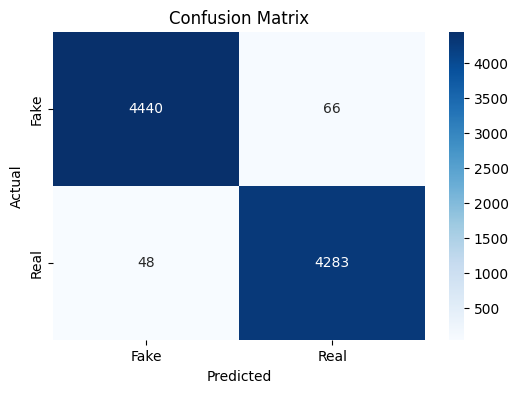

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict again just to be safe
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


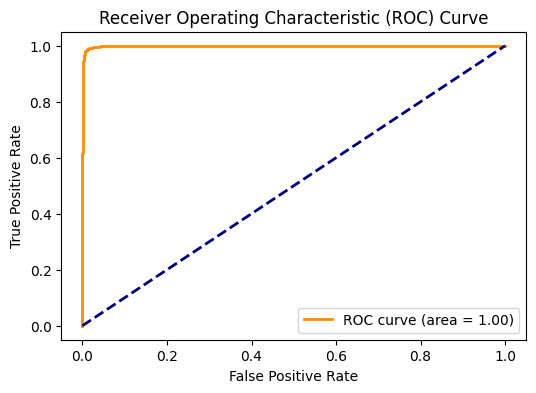

In [32]:
from sklearn.metrics import roc_curve, auc

# Get probabilities of the positive class (Fake in this case)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


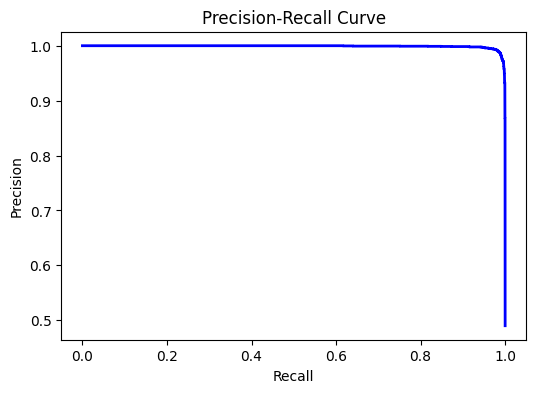

In [34]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
